# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-127-reg5-B--Spectrum--012--Spec.Data 1,103.846149,0.011464,1284.142577,0.010160,247.945502,1284.142577,723.943543,1.059939,3.382698,...,1.189236,1.255696,0.401158,0.008550,1.060268,1.090164,0.092531,0.002900,PseudoVoigtModel,PseudoVoigtModel
1,187-1-127-reg5-C--Spectrum--015--Spec.Data 1,103.943301,0.010990,1283.976499,0.009702,188.266931,1283.976499,539.169407,1.086574,2.283045,...,1.007862,1.067052,0.017085,0.011543,1.062232,1.089457,0.099121,0.004088,PseudoVoigtModel,PseudoVoigtModel
2,187-1-127-reg5-D--Spectrum--018--Spec.Data 1,103.735657,0.010820,1284.461881,0.009561,163.797793,1284.461881,406.349090,0.906981,1.791810,...,1.098039,1.247093,0.177839,0.011074,1.042500,1.056364,0.057057,0.003964,PseudoVoigtModel,PseudoVoigtModel
3,187-1-127-reg6-A--Spectrum--024--Spec.Data 1_C...,103.890837,0.047592,1284.077538,0.047523,417.100947,1284.077538,1212.508614,1.066193,4.943868,...,1.164407,1.180247,0.350579,0.005112,1.066667,1.065789,0.099932,0.001699,PseudoVoigtModel,PseudoVoigtModel
4,187-1-127-reg6-B--Spectrum--027--Spec.Data 1,103.613110,0.009453,1284.728247,0.008531,218.764594,1284.728247,510.830589,0.839777,2.340200,...,1.028056,1.089706,0.047122,0.007677,1.171196,1.164659,0.217375,0.002941,PseudoVoigtModel,PseudoVoigtModel


In [4]:
df2['filename']

0          187-1-127-reg5-B--Spectrum--012--Spec.Data 1
1          187-1-127-reg5-C--Spectrum--015--Spec.Data 1
2          187-1-127-reg5-D--Spectrum--018--Spec.Data 1
3     187-1-127-reg6-A--Spectrum--024--Spec.Data 1_C...
4          187-1-127-reg6-B--Spectrum--027--Spec.Data 1
5          187-1-127-reg6-C--Spectrum--030--Spec.Data 1
6          187-1-127-reg6-D--Spectrum--033--Spec.Data 1
7          187-1-127-reg7-A--Spectrum--037--Spec.Data 1
8          187-1-127-reg7-B--Spectrum--040--Spec.Data 1
9          187-1-127-reg7-C--Spectrum--043--Spec.Data 1
10         187-1-127-reg8-A--Spectrum--046--Spec.Data 1
11         187-1-127-reg8-B--Spectrum--048--Spec.Data 1
12     187-1-128-A_withmelt--Spectrum--060--Spec.Data 1
13    187-1-128-B--Spectrum--063--Spec.Data 1_CRR_Di...
14              187-1-128-A--Spectrum--064--Spec.Data 1
15              187-1-128-C--Spectrum--067--Spec.Data 1
16    187-1-128-D--Spectrum--070--Spec.Data 1_CRR_Di...
17              187-1-129-A--Spectrum--076--Spec

## First, get the metadata for this day

In [5]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'12 187-1-127-reg5-B--Spectrum--012--Information.txt'

## Now get all the important information out of the metadata files

In [6]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 23/23 [00:00<00:00, 991.25it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-127-reg5-B--Spectrum--012--Information.txt,"March 20, 2024\n",March,20.0,5.933,45.0,5.0,100.0,"['0h', '3m', '46s']",11:23:41 AM\n,41021.0,1325.004
1,187-1-127-reg5-C--Spectrum--015--Information.txt,"March 20, 2024\n",March,20.0,5.990,45.0,5.0,100.0,"['0h', '3m', '46s']",11:29:31 AM\n,41371.0,1325.004
2,187-1-127-reg5-D--Spectrum--018--Information.txt,"March 20, 2024\n",March,20.0,6.010,45.0,5.0,100.0,"['0h', '3m', '46s']",11:34:51 AM\n,41691.0,1325.004
3,187-1-127-reg6-A--Spectrum--024--Information.txt,"March 20, 2024\n",March,20.0,5.973,45.0,5.0,100.0,"['0h', '3m', '46s']",11:44:50 AM\n,42290.0,1325.004
4,187-1-127-reg6-B--Spectrum--027--Information.txt,"March 20, 2024\n",March,20.0,5.945,45.0,5.0,100.0,"['0h', '3m', '46s']",11:50:59 AM\n,42659.0,1325.004


In [7]:
meta

,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-127-reg5-B--Spectrum--012--Information.txt,"March 20, 2024\n",March,20.0,5.933,45.0,5.0,100.0,"['0h', '3m', '46s']",11:23:41 AM\n,41021.0,1325.004
1,187-1-127-reg5-C--Spectrum--015--Information.txt,"March 20, 2024\n",March,20.0,5.990,45.0,5.0,100.0,"['0h', '3m', '46s']",11:29:31 AM\n,41371.0,1325.004
2,187-1-127-reg5-D--Spectrum--018--Information.txt,"March 20, 2024\n",March,20.0,6.010,45.0,5.0,100.0,"['0h', '3m', '46s']",11:34:51 AM\n,41691.0,1325.004
3,187-1-127-reg6-A--Spectrum--024--Information.txt,"March 20, 2024\n",March,20.0,5.973,45.0,5.0,100.0,"['0h', '3m', '46s']",11:44:50 AM\n,42290.0,1325.004
4,187-1-127-reg6-B--Spectrum--027--Information.txt,"March 20, 2024\n",March,20.0,5.945,45.0,5.0,100.0,"['0h', '3m', '46s']",11:50:59 AM\n,42659.0,1325.004
5,187-1-127-reg6-C--Spectrum--030--Information.txt,"March 20, 2024\n",March,20.0,5.919,45.0,5.0,100.0,"['0h', '3m', '46s']",11:56:07 AM\n,42967.0,1325.004
6,187-1-127-reg6-D--Spectrum--033--Information.txt,"March 20, 2024\n",March,20.0,5.905,45.0,5.0,100.0,"['0h', '3m', '46s']",12:00:52 PM\n,43252.0,1325.004
7,187-1-127-reg7-A--Spectrum--037--Information.txt,"March 20, 2024\n",March,20.0,5.910,45.0,5.0,100.0,"['0h', '3m', '46s']",12:11:43 PM\n,43903.0,1325.004
8,187-1-127-reg7-B--Spectrum--040--Information.txt,"March 20, 2024\n",March,20.0,5.907,45.0,5.0,100.0,"['0h', '3m', '46s']",12:16:43 PM\n,44203.0,1325.004
9,187-1-127-reg7-C--Spectrum--043--Information.txt,"March 20, 2024\n",March,20.0,5.933,45.0,5.0,100.0,"['0h', '3m', '46s']",12:25:36 PM\n,44736.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [8]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-127-reg5-B--Spectrum--012--Information'

In [9]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-127-reg5-B--Spectrum--012',
       '187-1-127-reg5-C--Spectrum--015',
       '187-1-127-reg5-D--Spectrum--018',
       '187-1-127-reg6-A--Spectrum--024',
       '187-1-127-reg6-B--Spectrum--027',
       '187-1-127-reg6-C--Spectrum--030',
       '187-1-127-reg6-D--Spectrum--033',
       '187-1-127-reg7-A--Spectrum--037',
       '187-1-127-reg7-B--Spectrum--040',
       '187-1-127-reg7-C--Spectrum--043',
       '187-1-127-reg8-A--Spectrum--046',
       '187-1-127-reg8-B--Spectrum--048',
       '187-1-128-A_withmelt--Spectrum--060',
       '187-1-128-B--Spectrum--063', '187-1-128-A--Spectrum--064',
       '187-1-128-C--Spectrum--067', '187-1-128-D--Spectrum--070',
       '187-1-129-A--Spectrum--076', '187-1-130-A--Spectrum--087',
       '187-1-130-B--Spectrum--093', '187-1-130-B--Spectrum--094',
       '187-1-130-C--Spectrum--100', '187-1-130-D_hasmelt--Spectrum--105'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [10]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-127-reg5-B--Spectrum--012--Spec.Data 1


In [11]:
df2['filename']

0          187-1-127-reg5-B--Spectrum--012--Spec.Data 1
1          187-1-127-reg5-C--Spectrum--015--Spec.Data 1
2          187-1-127-reg5-D--Spectrum--018--Spec.Data 1
3     187-1-127-reg6-A--Spectrum--024--Spec.Data 1_C...
4          187-1-127-reg6-B--Spectrum--027--Spec.Data 1
5          187-1-127-reg6-C--Spectrum--030--Spec.Data 1
6          187-1-127-reg6-D--Spectrum--033--Spec.Data 1
7          187-1-127-reg7-A--Spectrum--037--Spec.Data 1
8          187-1-127-reg7-B--Spectrum--040--Spec.Data 1
9          187-1-127-reg7-C--Spectrum--043--Spec.Data 1
10         187-1-127-reg8-A--Spectrum--046--Spec.Data 1
11         187-1-127-reg8-B--Spectrum--048--Spec.Data 1
12     187-1-128-A_withmelt--Spectrum--060--Spec.Data 1
13    187-1-128-B--Spectrum--063--Spec.Data 1_CRR_Di...
14              187-1-128-A--Spectrum--064--Spec.Data 1
15              187-1-128-C--Spectrum--067--Spec.Data 1
16    187-1-128-D--Spectrum--070--Spec.Data 1_CRR_Di...
17              187-1-129-A--Spectrum--076--Spec

In [12]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-127-reg5-B--Spectrum--012',
       '187-1-127-reg5-C--Spectrum--015',
       '187-1-127-reg5-D--Spectrum--018',
       '187-1-127-reg6-A--Spectrum--024',
       '187-1-127-reg6-B--Spectrum--027',
       '187-1-127-reg6-C--Spectrum--030',
       '187-1-127-reg6-D--Spectrum--033',
       '187-1-127-reg7-A--Spectrum--037',
       '187-1-127-reg7-B--Spectrum--040',
       '187-1-127-reg7-C--Spectrum--043',
       '187-1-127-reg8-A--Spectrum--046',
       '187-1-127-reg8-B--Spectrum--048',
       '187-1-128-A_withmelt--Spectrum--060',
       '187-1-128-B--Spectrum--063', '187-1-128-A--Spectrum--064',
       '187-1-128-C--Spectrum--067', '187-1-128-D--Spectrum--070',
       '187-1-129-A--Spectrum--076', '187-1-130-A--Spectrum--087',
       '187-1-130-B--Spectrum--094', '187-1-130-C--Spectrum--100',
       '187-1-130-D_hasmelt--Spectrum--105'], dtype='<U48')

In [13]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-127-reg5-B--Spectrum--012,103.846149,0.011464,1284.142577,0.010160,247.945502,1284.142577,723.943543,1.059939,3.382698,...,March,20.0,5.933,45.0,5.0,100.0,"['0h', '3m', '46s']",11:23:41 AM\n,41021.0,1325.004
1,187-1-127-reg5-C--Spectrum--015,103.943301,0.010990,1283.976499,0.009702,188.266931,1283.976499,539.169407,1.086574,2.283045,...,March,20.0,5.990,45.0,5.0,100.0,"['0h', '3m', '46s']",11:29:31 AM\n,41371.0,1325.004
2,187-1-127-reg5-D--Spectrum--018,103.735657,0.010820,1284.461881,0.009561,163.797793,1284.461881,406.349090,0.906981,1.791810,...,March,20.0,6.010,45.0,5.0,100.0,"['0h', '3m', '46s']",11:34:51 AM\n,41691.0,1325.004
3,187-1-127-reg6-A--Spectrum--024,103.890837,0.047592,1284.077538,0.047523,417.100947,1284.077538,1212.508614,1.066193,4.943868,...,March,20.0,5.973,45.0,5.0,100.0,"['0h', '3m', '46s']",11:44:50 AM\n,42290.0,1325.004
4,187-1-127-reg6-B--Spectrum--027,103.613110,0.009453,1284.728247,0.008531,218.764594,1284.728247,510.830589,0.839777,2.340200,...,March,20.0,5.945,45.0,5.0,100.0,"['0h', '3m', '46s']",11:50:59 AM\n,42659.0,1325.004


In [14]:
df_combo

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-127-reg5-B--Spectrum--012,103.846149,0.011464,1284.142577,0.010160,247.945502,1284.142577,723.943543,1.059939,3.382698,...,March,20.0,5.933,45.0,5.0,100.0,"['0h', '3m', '46s']",11:23:41 AM\n,41021.0,1325.004
1,187-1-127-reg5-C--Spectrum--015,103.943301,0.010990,1283.976499,0.009702,188.266931,1283.976499,539.169407,1.086574,2.283045,...,March,20.0,5.990,45.0,5.0,100.0,"['0h', '3m', '46s']",11:29:31 AM\n,41371.0,1325.004
2,187-1-127-reg5-D--Spectrum--018,103.735657,0.010820,1284.461881,0.009561,163.797793,1284.461881,406.349090,0.906981,1.791810,...,March,20.0,6.010,45.0,5.0,100.0,"['0h', '3m', '46s']",11:34:51 AM\n,41691.0,1325.004
3,187-1-127-reg6-A--Spectrum--024,103.890837,0.047592,1284.077538,0.047523,417.100947,1284.077538,1212.508614,1.066193,4.943868,...,March,20.0,5.973,45.0,5.0,100.0,"['0h', '3m', '46s']",11:44:50 AM\n,42290.0,1325.004
4,187-1-127-reg6-B--Spectrum--027,103.613110,0.009453,1284.728247,0.008531,218.764594,1284.728247,510.830589,0.839777,2.340200,...,March,20.0,5.945,45.0,5.0,100.0,"['0h', '3m', '46s']",11:50:59 AM\n,42659.0,1325.004
5,187-1-127-reg6-C--Spectrum--030,103.649536,0.013537,1284.705880,0.012250,108.025000,1284.705880,234.116857,0.809607,1.677183,...,March,20.0,5.919,45.0,5.0,100.0,"['0h', '3m', '46s']",11:56:07 AM\n,42967.0,1325.004
6,187-1-127-reg6-D--Spectrum--033,103.839924,0.009835,1284.236615,0.008753,244.647587,1284.236615,678.863793,1.022491,2.842172,...,March,20.0,5.905,45.0,5.0,100.0,"['0h', '3m', '46s']",12:00:52 PM\n,43252.0,1325.004
7,187-1-127-reg7-A--Spectrum--037,103.793920,0.011049,1284.288838,0.009709,233.944309,1284.288838,655.653946,1.010152,2.975539,...,March,20.0,5.910,45.0,5.0,100.0,"['0h', '3m', '46s']",12:11:43 PM\n,43903.0,1325.004
8,187-1-127-reg7-B--Spectrum--040,103.697510,0.010282,1284.500668,0.009161,228.014033,1284.500668,575.333782,0.912699,2.953509,...,March,20.0,5.907,45.0,5.0,100.0,"['0h', '3m', '46s']",12:16:43 PM\n,44203.0,1325.004
9,187-1-127-reg7-C--Spectrum--043,103.786868,0.011519,1284.334509,0.010119,201.552351,1284.334509,551.211839,0.990236,2.469456,...,March,20.0,5.933,45.0,5.0,100.0,"['0h', '3m', '46s']",12:25:36 PM\n,44736.0,1325.004


In [15]:
str_prefix

' '

## If you have secondary phases, now is the time to merge those in

In [16]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)
df_combo_sec_phase

Made a df!
good job, no duplicate file names


,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio
0,187-1-127-reg5-B--Spectrum--012,103.846149,0.011464,1284.142577,0.010160,247.945502,1284.142577,723.943543,1.059939,3.382698,...,100.0,"['0h', '3m', '46s']",11:23:41 AM\n,41021.0,1325.004,1095.436791,300.315308,25.664977,Spline,0.162487
1,187-1-127-reg5-C--Spectrum--015,103.943301,0.010990,1283.976499,0.009702,188.266931,1283.976499,539.169407,1.086574,2.283045,...,100.0,"['0h', '3m', '46s']",11:29:31 AM\n,41371.0,1325.004,NaN,NaN,NaN,NaN,NaN
2,187-1-127-reg5-D--Spectrum--018,103.735657,0.010820,1284.461881,0.009561,163.797793,1284.461881,406.349090,0.906981,1.791810,...,100.0,"['0h', '3m', '46s']",11:34:51 AM\n,41691.0,1325.004,NaN,NaN,NaN,NaN,NaN
3,187-1-127-reg6-A--Spectrum--024,103.890837,0.047592,1284.077538,0.047523,417.100947,1284.077538,1212.508614,1.066193,4.943868,...,100.0,"['0h', '3m', '46s']",11:44:50 AM\n,42290.0,1325.004,NaN,NaN,NaN,NaN,NaN
4,187-1-127-reg6-B--Spectrum--027,103.613110,0.009453,1284.728247,0.008531,218.764594,1284.728247,510.830589,0.839777,2.340200,...,100.0,"['0h', '3m', '46s']",11:50:59 AM\n,42659.0,1325.004,1095.505874,414.752157,25.871116,Spline,0.329625
5,187-1-127-reg6-C--Spectrum--030,103.649536,0.013537,1284.705880,0.012250,108.025000,1284.705880,234.116857,0.809607,1.677183,...,100.0,"['0h', '3m', '46s']",11:56:07 AM\n,42967.0,1325.004,1095.505874,269.816535,22.992369,Spline,0.441369
6,187-1-127-reg6-D--Spectrum--033,103.839924,0.009835,1284.236615,0.008753,244.647587,1284.236615,678.863793,1.022491,2.842172,...,100.0,"['0h', '3m', '46s']",12:00:52 PM\n,43252.0,1325.004,NaN,NaN,NaN,NaN,NaN
7,187-1-127-reg7-A--Spectrum--037,103.793920,0.011049,1284.288838,0.009709,233.944309,1284.288838,655.653946,1.010152,2.975539,...,100.0,"['0h', '3m', '46s']",12:11:43 PM\n,43903.0,1325.004,NaN,NaN,NaN,NaN,NaN
8,187-1-127-reg7-B--Spectrum--040,103.697510,0.010282,1284.500668,0.009161,228.014033,1284.500668,575.333782,0.912699,2.953509,...,100.0,"['0h', '3m', '46s']",12:16:43 PM\n,44203.0,1325.004,NaN,NaN,NaN,NaN,NaN
9,187-1-127-reg7-C--Spectrum--043,103.786868,0.011519,1284.334509,0.010119,201.552351,1284.334509,551.211839,0.990236,2.469456,...,100.0,"['0h', '3m', '46s']",12:25:36 PM\n,44736.0,1325.004,NaN,NaN,NaN,NaN,NaN


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [17]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

In [18]:
df_combo_sec_phase

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio
0,187-1-127-reg5-B--Spectrum--012,103.846149,0.011464,1284.142577,0.010160,247.945502,1284.142577,723.943543,1.059939,3.382698,...,100.0,"['0h', '3m', '46s']",11:23:41 AM\n,41021.0,1325.004,1095.436791,300.315308,25.664977,Spline,0.162487
1,187-1-127-reg5-C--Spectrum--015,103.943301,0.010990,1283.976499,0.009702,188.266931,1283.976499,539.169407,1.086574,2.283045,...,100.0,"['0h', '3m', '46s']",11:29:31 AM\n,41371.0,1325.004,NaN,NaN,NaN,NaN,NaN
2,187-1-127-reg5-D--Spectrum--018,103.735657,0.010820,1284.461881,0.009561,163.797793,1284.461881,406.349090,0.906981,1.791810,...,100.0,"['0h', '3m', '46s']",11:34:51 AM\n,41691.0,1325.004,NaN,NaN,NaN,NaN,NaN
3,187-1-127-reg6-A--Spectrum--024,103.890837,0.047592,1284.077538,0.047523,417.100947,1284.077538,1212.508614,1.066193,4.943868,...,100.0,"['0h', '3m', '46s']",11:44:50 AM\n,42290.0,1325.004,NaN,NaN,NaN,NaN,NaN
4,187-1-127-reg6-B--Spectrum--027,103.613110,0.009453,1284.728247,0.008531,218.764594,1284.728247,510.830589,0.839777,2.340200,...,100.0,"['0h', '3m', '46s']",11:50:59 AM\n,42659.0,1325.004,1095.505874,414.752157,25.871116,Spline,0.329625
5,187-1-127-reg6-C--Spectrum--030,103.649536,0.013537,1284.705880,0.012250,108.025000,1284.705880,234.116857,0.809607,1.677183,...,100.0,"['0h', '3m', '46s']",11:56:07 AM\n,42967.0,1325.004,1095.505874,269.816535,22.992369,Spline,0.441369
6,187-1-127-reg6-D--Spectrum--033,103.839924,0.009835,1284.236615,0.008753,244.647587,1284.236615,678.863793,1.022491,2.842172,...,100.0,"['0h', '3m', '46s']",12:00:52 PM\n,43252.0,1325.004,NaN,NaN,NaN,NaN,NaN
7,187-1-127-reg7-A--Spectrum--037,103.793920,0.011049,1284.288838,0.009709,233.944309,1284.288838,655.653946,1.010152,2.975539,...,100.0,"['0h', '3m', '46s']",12:11:43 PM\n,43903.0,1325.004,NaN,NaN,NaN,NaN,NaN
8,187-1-127-reg7-B--Spectrum--040,103.697510,0.010282,1284.500668,0.009161,228.014033,1284.500668,575.333782,0.912699,2.953509,...,100.0,"['0h', '3m', '46s']",12:16:43 PM\n,44203.0,1325.004,NaN,NaN,NaN,NaN,NaN
9,187-1-127-reg7-C--Spectrum--043,103.786868,0.011519,1284.334509,0.010119,201.552351,1284.334509,551.211839,0.990236,2.469456,...,100.0,"['0h', '3m', '46s']",12:25:36 PM\n,44736.0,1325.004,NaN,NaN,NaN,NaN,NaN


## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [19]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.387281146252857e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-127-reg5-B--Spectrum--012,0.351700,0.005496,0.004969,0.002349,103.603959,0.011464,0.000785,0.011464,5.933,...,41021.0,1095.436791,300.315308,25.664977,Spline,0.162487,41021.0,0.997668,0.997660,0.997675
1,187-1-127-reg5-C--Spectrum--015,0.394038,0.005391,0.004853,0.002348,103.700759,0.010992,0.000783,0.010990,5.990,...,41371.0,NaN,NaN,NaN,NaN,NaN,41371.0,0.997667,0.997659,0.997674
2,187-1-127-reg5-D--Spectrum--018,0.304288,0.005167,0.004600,0.002352,103.493484,0.010823,0.000778,0.010820,6.010,...,41691.0,NaN,NaN,NaN,NaN,NaN,41691.0,0.997665,0.997658,0.997673
3,187-1-127-reg6-A--Spectrum--024,0.370902,0.020885,0.020753,0.002348,103.648083,0.047487,0.000774,0.047592,5.973,...,42290.0,NaN,NaN,NaN,NaN,NaN,42290.0,0.997663,0.997656,0.997671
4,187-1-127-reg6-B--Spectrum--027,0.252690,0.004594,0.003943,0.002358,103.370870,0.009462,0.000769,0.009453,5.945,...,42659.0,1095.505874,414.752157,25.871116,Spline,0.329625,42659.0,0.997662,0.997655,0.997669


In [20]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.387281146252857e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-127-reg5-B--Spectrum--012,0.351700,0.005496,0.004969,0.002349,103.603959,0.011464,0.000785,0.011464,5.933,...,41021.0,1095.436791,300.315308,25.664977,Spline,0.162487,41021.0,0.997668,0.997660,0.997675
1,187-1-127-reg5-C--Spectrum--015,0.394038,0.005391,0.004853,0.002348,103.700759,0.010992,0.000783,0.010990,5.990,...,41371.0,NaN,NaN,NaN,NaN,NaN,41371.0,0.997667,0.997659,0.997674
2,187-1-127-reg5-D--Spectrum--018,0.304288,0.005167,0.004600,0.002352,103.493484,0.010823,0.000778,0.010820,6.010,...,41691.0,NaN,NaN,NaN,NaN,NaN,41691.0,0.997665,0.997658,0.997673
3,187-1-127-reg6-A--Spectrum--024,0.370902,0.020885,0.020753,0.002348,103.648083,0.047487,0.000774,0.047592,5.973,...,42290.0,NaN,NaN,NaN,NaN,NaN,42290.0,0.997663,0.997656,0.997671
4,187-1-127-reg6-B--Spectrum--027,0.252690,0.004594,0.003943,0.002358,103.370870,0.009462,0.000769,0.009453,5.945,...,42659.0,1095.505874,414.752157,25.871116,Spline,0.329625,42659.0,0.997662,0.997655,0.997669


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [21]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_March 20, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

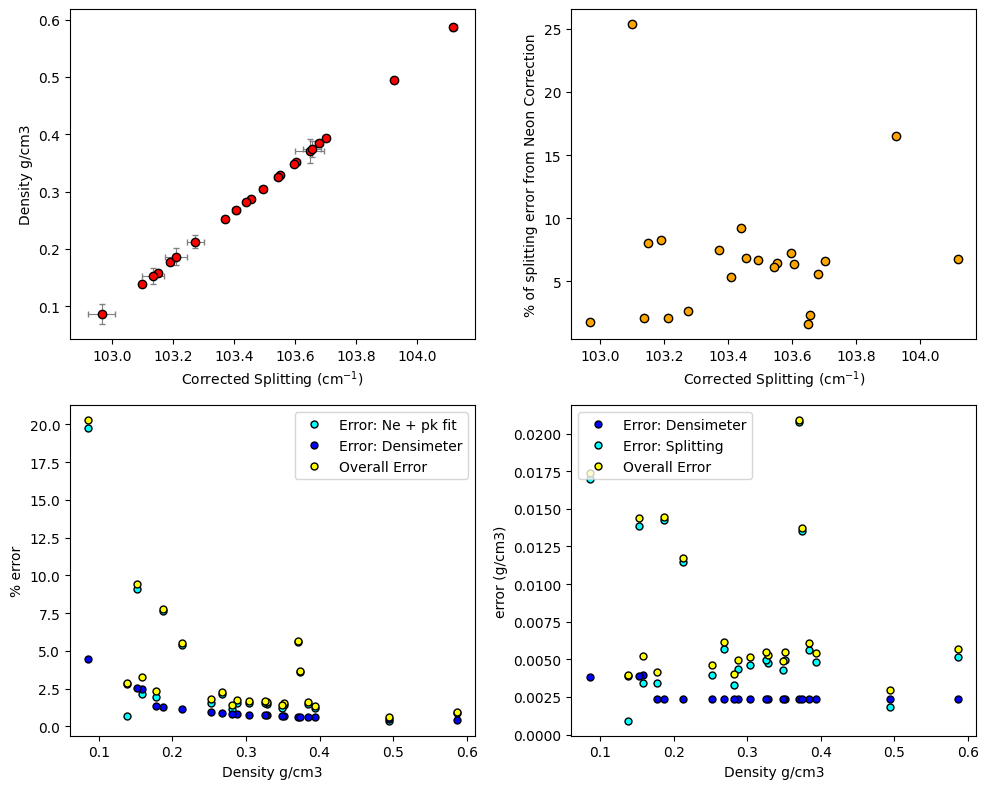

In [22]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

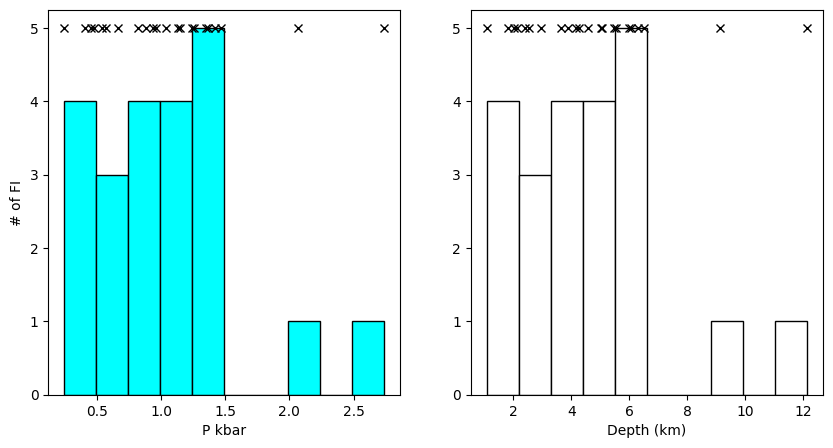

In [23]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')